# **Modul 1 Praktikum Analisis Big Data**

---

### **Pembersihan dan Transformasi Data**

In [6]:
# Library yang digunakan
import boto3
import pandas as pd
from pyathena import connect
import pyarrow.parquet as pq
import s3fs

In [ ]:
# Baca file Parquet langsung dari S3
parquet_file = "s3://bigdata-practicum-dataset/modul-1/parquet/yellow_tripdata_2024-11.parquet"
df = pd.read_parquet(parquet_file, engine="pyarrow")

In [ ]:
#Baca file dari file csv
df = pd.read_csv("C:/Users/elokf/OneDrive/Dokumen/Kuliah ITERA/Praktikum/Praktikum ABD/Modul 1/yellow_tripdata_2024-11.csv")
df

C:\Users\elokf\AppData\Local\Temp\ipykernel_30780\3023284765.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/elokf/OneDrive/Dokumen/Kuliah ITERA/Praktikum/Praktikum ABD/Modul 1/yellow_tripdata_2024-11.csv")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1.0,1.93,1.0,N,239,262,2,-12.80,-1.0,-0.5,0.00,0.00,-1.0,-17.80,-2.5,0.0
1,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1.0,1.93,1.0,N,239,263,2,12.80,1.0,0.5,0.00,0.00,1.0,17.80,2.5,0.0
2,1,2024-11-01 00:37:36,2024-11-01 01:28:36,1.0,34.30,5.0,N,219,265,1,259.00,0.0,0.0,15.00,0.00,1.0,275.00,0.0,0.0
3,2,2024-11-01 00:12:55,2024-11-01 00:22:17,2.0,0.93,1.0,N,186,107,1,10.00,1.0,0.5,1.00,0.00,1.0,16.00,2.5,0.0
4,2,2024-11-01 00:54:45,2024-11-01 00:59:47,1.0,0.38,1.0,N,79,79,1,6.50,1.0,0.5,1.00,0.00,1.0,12.50,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646364,2,2024-11-30 23:11:15,2024-11-30 23:19:33,NaN,1.09,NaN,NaN,162,142,0,1.00,0.0,0.5,0.00,0.00,1.0,5.00,NaN,NaN
3646365,1,2024-11-30 23:49:30,2024-12-01 00:27:39,NaN,20.10,NaN,NaN,132,238,0,70.00,0.0,0.5,8.09,6.94,1.0,89.03,NaN,NaN
3646366,2,2024-11-30 23:31:46,2024-12-01 00:04:32,NaN,1.38,NaN,NaN,100,230,0,18.71,0.0,0.5,0.00,0.00,1.0,22.71,NaN,NaN
3646367,2,2024-11-30 23:41:21,2024-11-30 23:53:20,NaN,2.63,NaN,NaN,42,75,0,13.26,0.0,0.5,0.00,0.00,1.0,14.76,NaN,NaN


In [9]:
# Lihat struktur dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 528.6+ MB


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1.0,1.93,1.0,N,239,262,2,-12.8,-1.0,-0.5,0.0,0.0,-1.0,-17.8,-2.5,0.0
1,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1.0,1.93,1.0,N,239,263,2,12.8,1.0,0.5,0.0,0.0,1.0,17.8,2.5,0.0
2,1,2024-11-01 00:37:36,2024-11-01 01:28:36,1.0,34.30,5.0,N,219,265,1,259.0,0.0,0.0,15.0,0.0,1.0,275.0,0.0,0.0
3,2,2024-11-01 00:12:55,2024-11-01 00:22:17,2.0,0.93,1.0,N,186,107,1,10.0,1.0,0.5,1.0,0.0,1.0,16.0,2.5,0.0
4,2,2024-11-01 00:54:45,2024-11-01 00:59:47,1.0,0.38,1.0,N,79,79,1,6.5,1.0,0.5,1.0,0.0,1.0,12.5,2.5,0.0


### **Identifikasi Data yang Hilang (Missing Values)**

In [10]:
# Cek jumlah nilai yang hilang per kolom
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

passenger_count         373674
RatecodeID              373674
store_and_fwd_flag      373674
congestion_surcharge    373674
Airport_fee             373674
dtype: int64

In [11]:
# Hapus baris yang memiliki nilai kosong
df_clean = df.dropna()

# Atau isi dengan nilai default (misal, isi 0 jika fare_amount kosong)
df_filled = df.fillna({'fare_amount': 0})

### **Periksa Outlier (Nilai Ekstrem)**

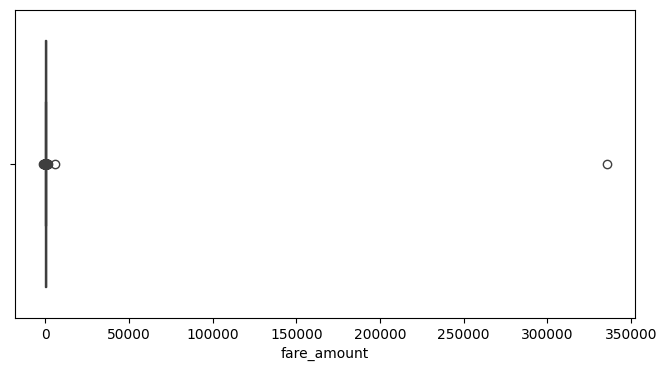

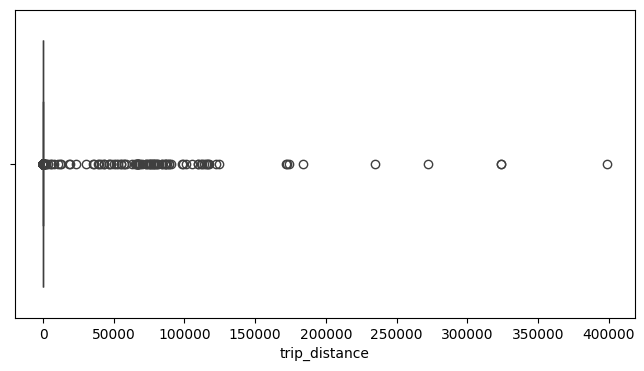

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk melihat outlier pada fare_amount
plt.figure(figsize=(8,4))
sns.boxplot(x=df["fare_amount"])
plt.show()

# Boxplot untuk trip_distance
plt.figure(figsize=(8,4))
sns.boxplot(x=df["trip_distance"])
plt.show()

### **Filter data yang valid**
* Menghapus transaksi dengan trip_distance = 0
* Memastikan fare_amount dalam batas wajar
* Menghapus timestamp yang tidak valid

In [13]:
# Hapus data dengan trip_distance = 0 atau tarif tidak masuk akal
df_filtered = df[(df["trip_distance"] > 0) & (df["fare_amount"] > 0) & (df["fare_amount"] < 500)]

In [14]:
from datetime import datetime

# Hapus data dengan trip_distance 0
df_filtered = df[df["trip_distance"] > 0]

# Hapus data dengan fare_amount tidak masuk akal
df_filtered = df_filtered[(df_filtered["fare_amount"] > 2.5) & (df_filtered["fare_amount"] < 500)]

# Konversi waktu ke format datetime
df_filtered["tpep_pickup_datetime"] = pd.to_datetime(df_filtered["tpep_pickup_datetime"])
df_filtered["tpep_dropoff_datetime"] = pd.to_datetime(df_filtered["tpep_dropoff_datetime"])

# Hapus data jika waktu dropoff lebih kecil dari pickup (tidak valid)
df_filtered = df_filtered[df_filtered["tpep_dropoff_datetime"] > df_filtered["tpep_pickup_datetime"]]

In [15]:
# Simpan kembali dataset bersih ke S3
df_filtered.to_parquet("s3://bigdata-practicum-dataset/saving/yellow_taxi_cleaned_final.parquet", index=False)

### **EDA Dengan Load Data yang Sudah Dibersihkan dari S3**

In [16]:
import pandas as pd

# Load dataset yang sudah dibersihkan dari S3
df = pd.read_parquet("s3://bigdata-practicum-dataset/saving/yellow_taxi_cleaned_final.parquet")

# Lihat ringkasan dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501750 entries, 0 to 3501749
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1.0,1.93,1.0,N,239,263,2,12.8,1.0,0.5,0.0,0.0,1.0,17.8,2.5,0.0
1,1,2024-11-01 00:37:36,2024-11-01 01:28:36,1.0,34.30,5.0,N,219,265,1,259.0,0.0,0.0,15.0,0.0,1.0,275.0,0.0,0.0
2,2,2024-11-01 00:12:55,2024-11-01 00:22:17,2.0,0.93,1.0,N,186,107,1,10.0,1.0,0.5,1.0,0.0,1.0,16.0,2.5,0.0
3,2,2024-11-01 00:54:45,2024-11-01 00:59:47,1.0,0.38,1.0,N,79,79,1,6.5,1.0,0.5,1.0,0.0,1.0,12.5,2.5,0.0
4,2,2024-11-01 00:19:00,2024-11-01 00:21:28,1.0,0.48,1.0,N,237,236,2,5.1,1.0,0.5,0.0,0.0,1.0,10.1,2.5,0.0


## Analisis Area dengan Permintaan Taksi Tertinggi

In [17]:
# Hitung jumlah perjalanan berdasarkan lokasi penjemputan (PULocationID)
pickup_counts = df["PULocationID"].value_counts().reset_index()
pickup_counts.columns = ["PULocationID", "Total_Pickups"]

# Tampilkan 10 lokasi dengan permintaan taksi tertinggi
top_pickup_locations = pickup_counts.head(10)
print(top_pickup_locations)

   PULocationID  Total_Pickups
0           237         175544
1           161         166182
2           236         155796
3           132         151481
4           230         120812
5           162         117688
6           142         117644
7           186         115976
8           163         102894
9           138         101690


In [55]:
# Hitung jumlah perjalanan per lokasi drop-off dan urutkan dari terbesar ke terkecil
top_dropoff = df["DOLocationID"].value_counts().nlargest(10).reset_index()
top_dropoff.columns = ["DOLocationID", "Total_Dropoffs"]
print(top_dropoff)

   DOLocationID  Total_Dropoffs
0           236          162121
1           237          158116
2           161          133520
3           230          110805
4           142          100677
5           162          100651
6           170          100333
7           239           99647
8           141           92038
9            68           91938


C:\Users\elokf\AppData\Local\Temp\ipykernel_30780\3431311404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


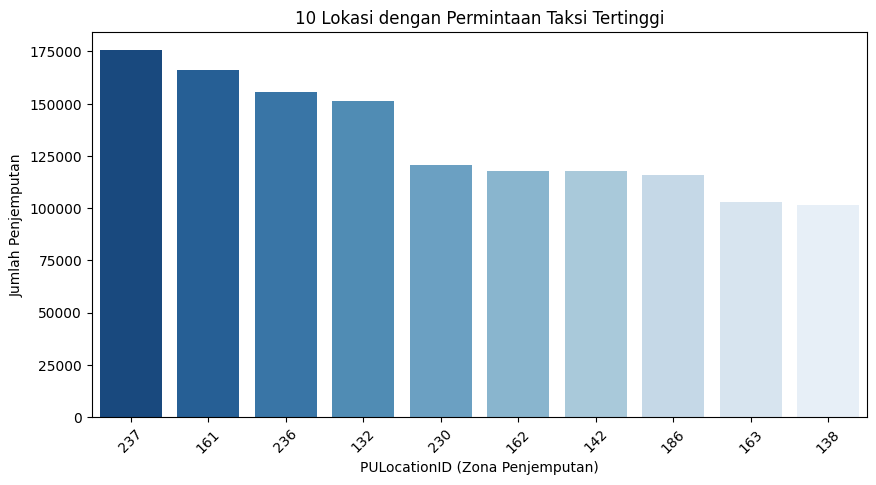

In [ ]:
# Visualisasi 10 loaksi dengan permintaan taksi tertingi
plt.figure(figsize=(10,5))
sns.barplot(
    x="PULocationID", 
    y="Total_Pickups", 
    data=top_pickup_locations, 
    order=top_pickup_locations["PULocationID"],  # Pastikan urutan sesuai dengan sorting
    palette="Blues_r"
)

plt.xlabel("PULocationID (Zona Penjemputan)")
plt.ylabel("Jumlah Penjemputan")
plt.title("10 Lokasi dengan Permintaan Taksi Tertinggi")
plt.xticks(rotation=45)
plt.show()

## Zona dengan Drop-off Tertinggi

C:\Users\elokf\AppData\Local\Temp\ipykernel_30780\1031349913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


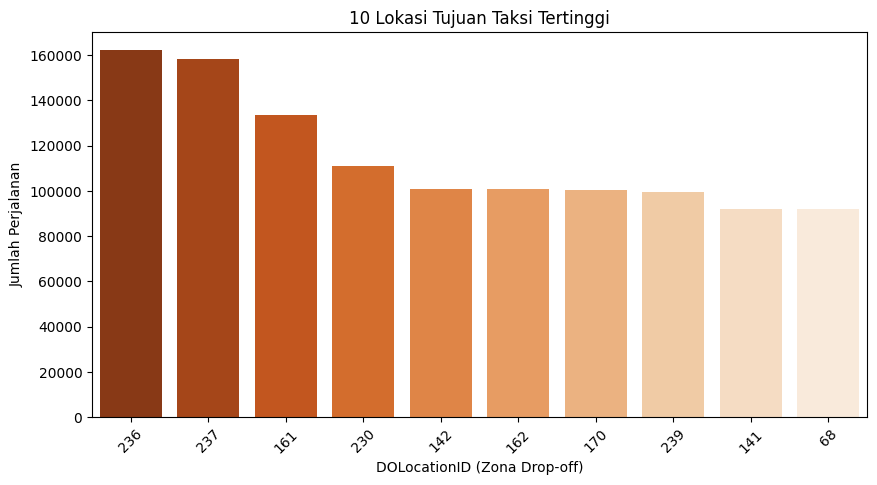

In [ ]:
# Visualisasi dengan urutan dari kiri ke kanan
plt.figure(figsize=(10,5))
sns.barplot(
    x="DOLocationID", 
    y="Total_Dropoffs", 
    data=top_dropoff, 
    order=top_dropoff["DOLocationID"], 
    palette="Oranges_r"
)

plt.xlabel("DOLocationID (Zona Drop-off)")
plt.ylabel("Jumlah Perjalanan")
plt.title("10 Lokasi Tujuan Taksi Tertinggi")
plt.xticks(rotation=45)
plt.show()

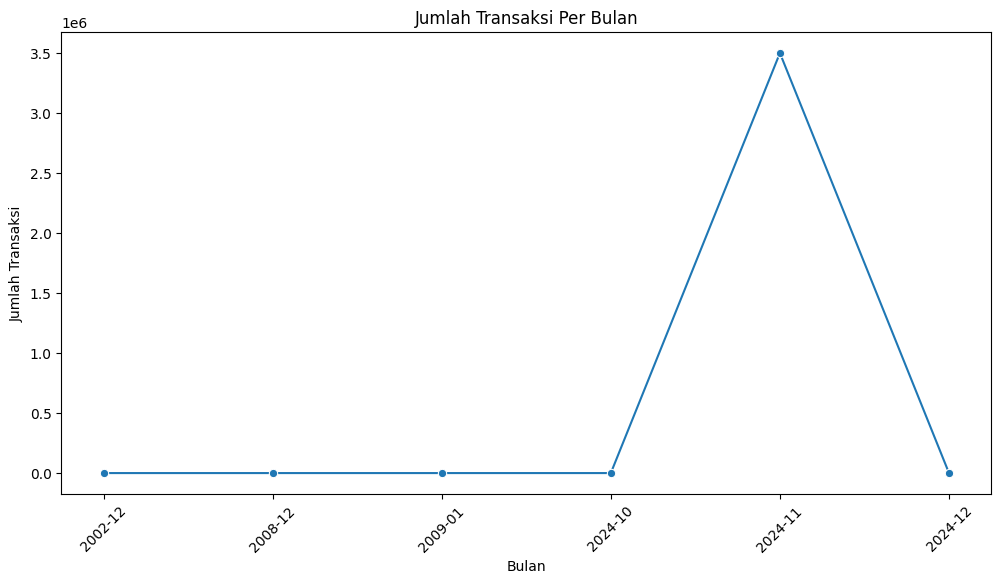

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tambahkan kolom bulan
df["month"] = df["tpep_pickup_datetime"].dt.strftime('%Y-%m')

# Hitung jumlah transaksi per bulan
monthly_trips = df.groupby("month")["fare_amount"].count()

# Visualisasi tren perjalanan bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trips.index, y=monthly_trips.values, marker='o')
plt.xticks(rotation=45)
plt.title("Jumlah Transaksi Per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.show()

### **Total Transasksi**

In [19]:
total_transaksi = len(df)
print(f"Total transaksi dalam dataset: {total_transaksi}")

Total transaksi dalam dataset: 3501750


### **Analisis Tarif Rata-rata per Transaksi dan Analisis Tren Perjalanan Bulanan**

Tarif rata-rata per transaksi: $19.78


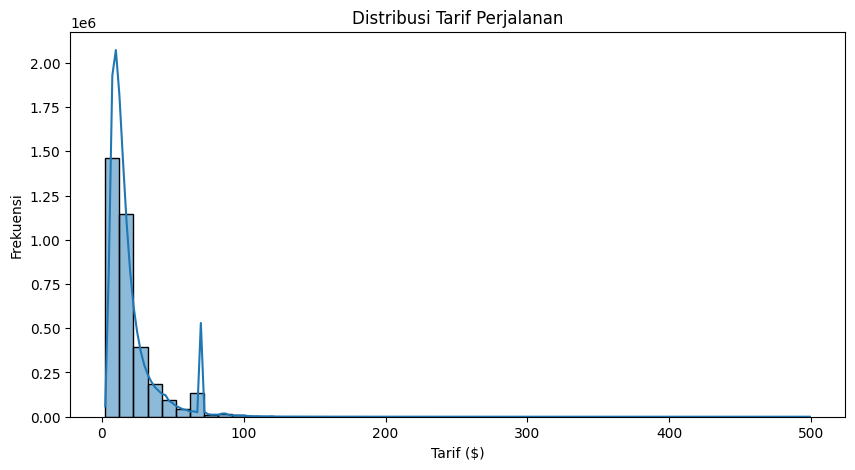

In [20]:
# Hitung rata-rata tarif perjalanan
average_fare = df["fare_amount"].mean()
print(f"Tarif rata-rata per transaksi: ${average_fare:.2f}")

# Visualisasi distribusi tarif perjalanan
plt.figure(figsize=(10, 5))
sns.histplot(df["fare_amount"], bins=50, kde=True)
plt.title("Distribusi Tarif Perjalanan")
plt.xlabel("Tarif ($)")
plt.ylabel("Frekuensi")
plt.show()

### **Analisis Distribusi Metode Pembayaran**

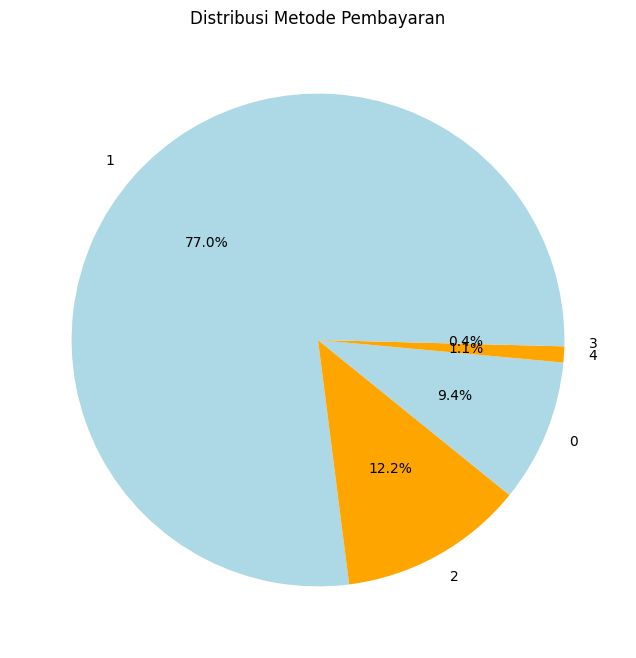

In [21]:
# Cek distribusi metode pembayaran
payment_counts = df["payment_type"].value_counts()

# Visualisasi pie chart metode pembayaran
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Distribusi Metode Pembayaran")
plt.show()

### **Identifikasi Jam Tersibuk dalam Sehari**

C:\Users\elokf\AppData\Local\Temp\ipykernel_30780\828851265.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="coolwarm")


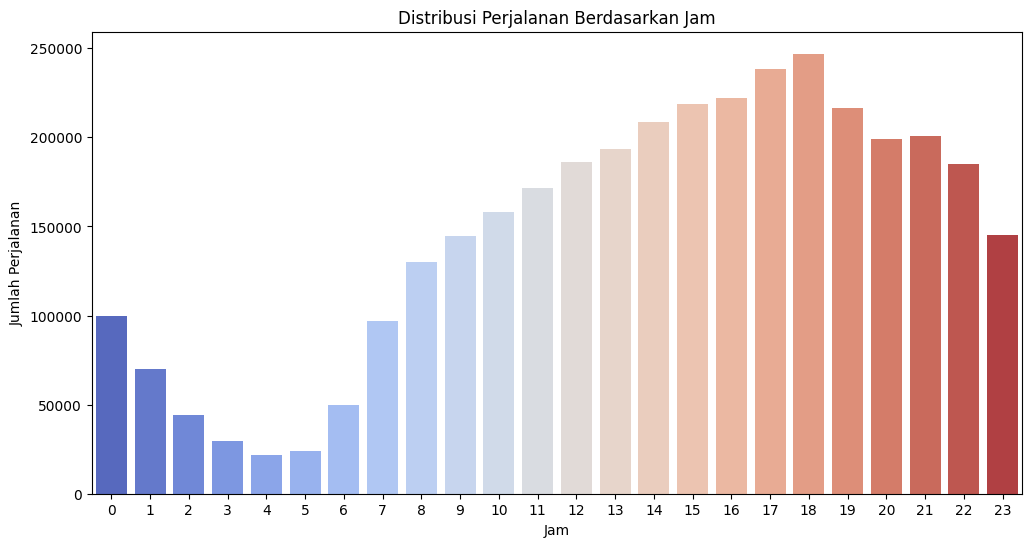

In [22]:
# Tambahkan kolom jam
df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Hitung jumlah perjalanan per jam
hourly_trips = df.groupby("hour")["fare_amount"].count()

# Visualisasi perjalanan per jam
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="coolwarm")
plt.title("Distribusi Perjalanan Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Perjalanan")
plt.xticks(range(0, 24))
plt.show()

### **Analisis Hubungan Jarak dan Tarif Perjalanan**

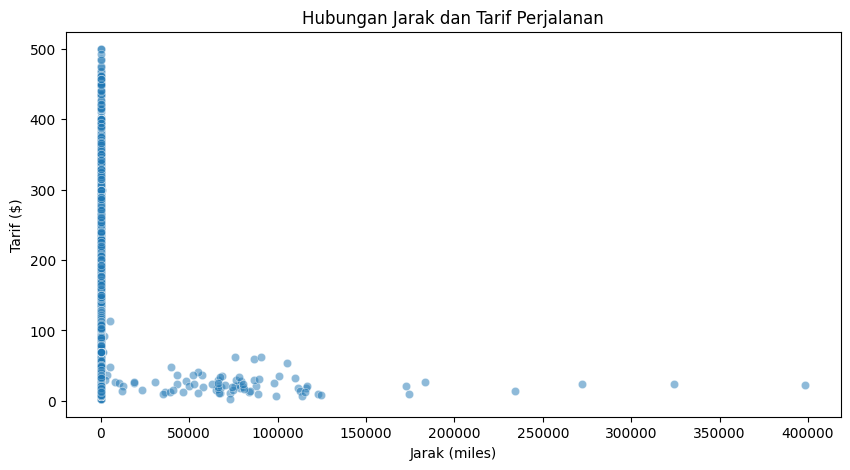

In [23]:
# Scatter plot jarak vs tarif perjalanan
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["trip_distance"], y=df["fare_amount"], alpha=0.5)
plt.title("Hubungan Jarak dan Tarif Perjalanan")
plt.xlabel("Jarak (miles)")
plt.ylabel("Tarif ($)")
plt.show()

### **Deteksi Outlier pada Tarif Perjalanan**

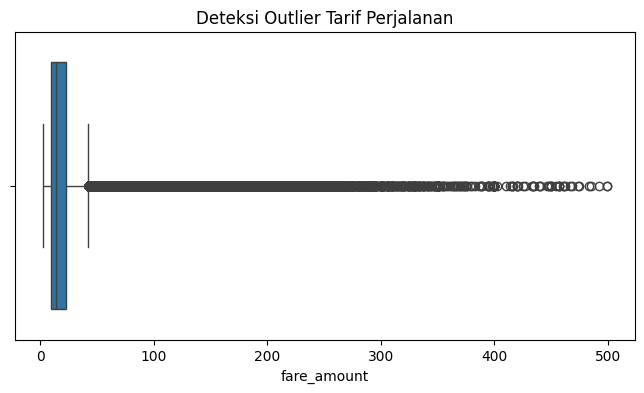

In [24]:
# Boxplot untuk mendeteksi outlier tarif perjalanan
plt.figure(figsize=(8,4))
sns.boxplot(x=df["fare_amount"])
plt.title("Deteksi Outlier Tarif Perjalanan")
plt.show()

### **Visualisasi Data**

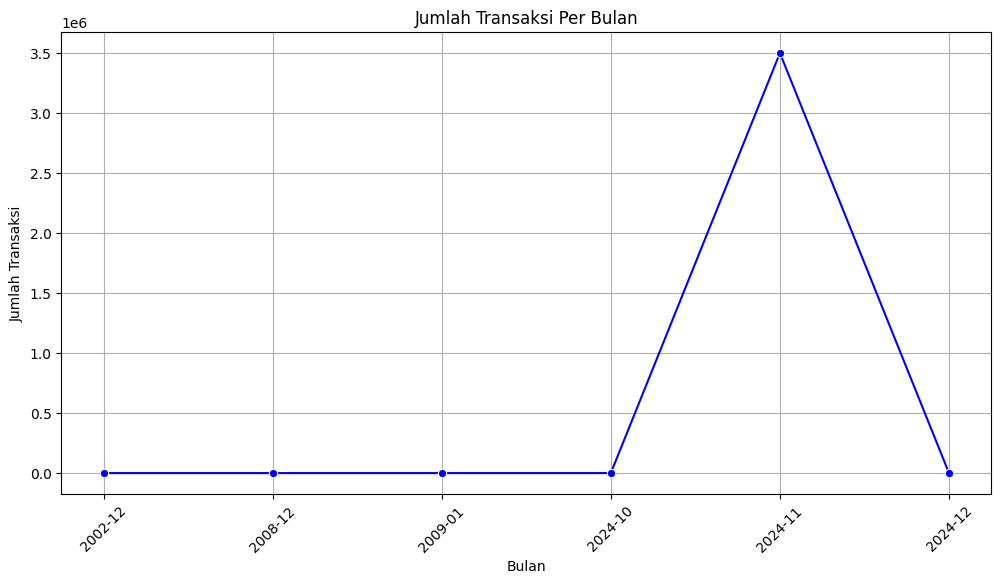

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah transaksi per bulan
monthly_trips = df.groupby("month")["fare_amount"].count()

# Visualisasi tren perjalanan bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trips.index, y=monthly_trips.values, marker='o', color='b')
plt.xticks(rotation=45)
plt.title("Jumlah Transaksi Per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.grid(True)
plt.show()

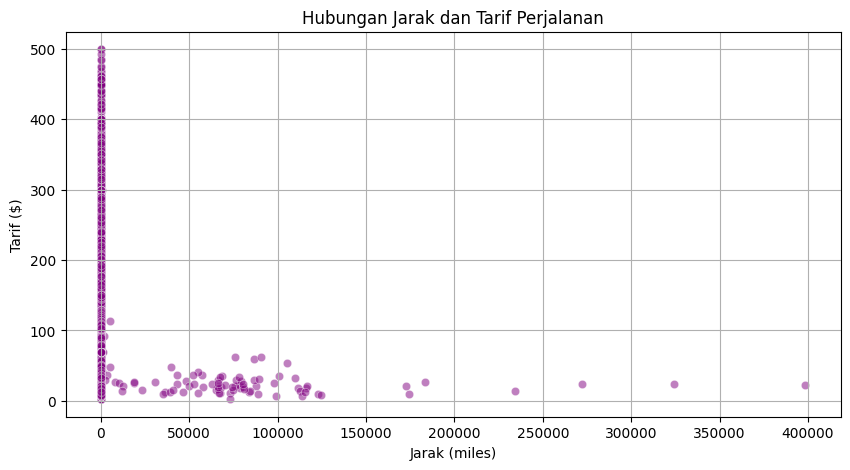

In [26]:
# Scatter plot jarak vs tarif perjalanan
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["trip_distance"], y=df["fare_amount"], alpha=0.5, color='purple')
plt.title("Hubungan Jarak dan Tarif Perjalanan")
plt.xlabel("Jarak (miles)")
plt.ylabel("Tarif ($)")
plt.grid(True)
plt.show()

C:\Users\elokf\AppData\Local\Temp\ipykernel_30780\2058598540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="coolwarm")


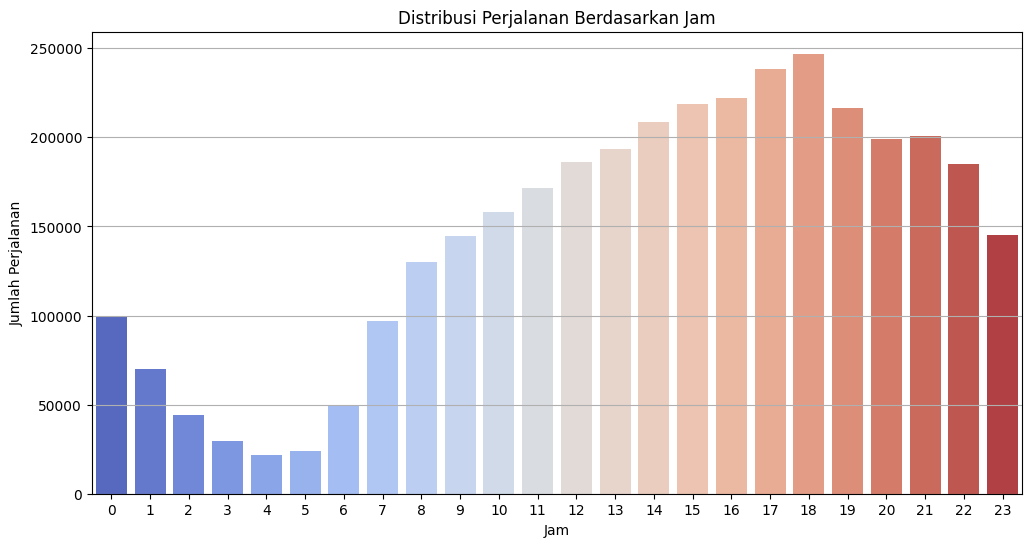

In [27]:
# Hitung jumlah perjalanan per jam
hourly_trips = df.groupby("hour")["fare_amount"].count()

# Visualisasi perjalanan per jam
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="coolwarm")
plt.title("Distribusi Perjalanan Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Perjalanan")
plt.xticks(range(0, 24))
plt.grid(axis="y")
plt.show()

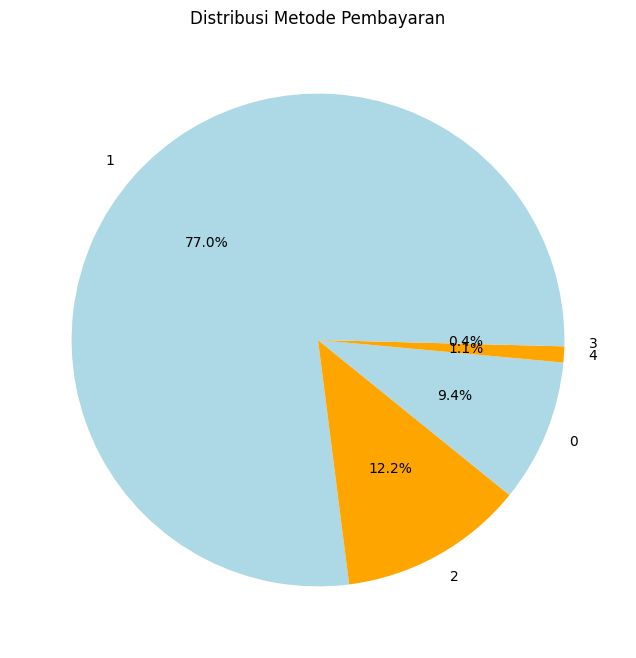

In [28]:
# Cek distribusi metode pembayaran
payment_counts = df["payment_type"].value_counts()

# Visualisasi pie chart metode pembayaran
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Distribusi Metode Pembayaran")
plt.show()

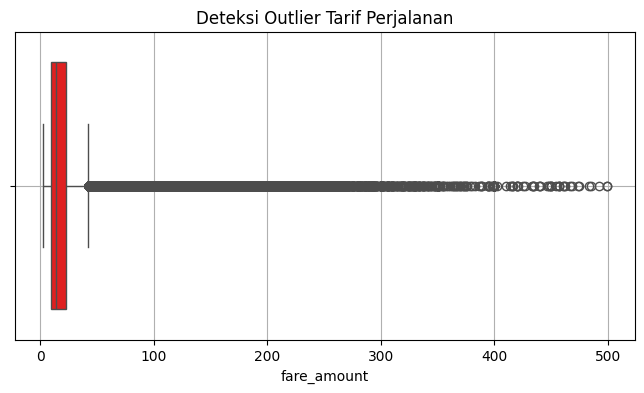

In [29]:
# Boxplot untuk mendeteksi outlier tarif perjalanan
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["fare_amount"], color='red')
plt.title("Deteksi Outlier Tarif Perjalanan")
plt.grid(True)
plt.show()